# Plot a 2d Gaussian distribution

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal

In [10]:
# interactive plotting (see first link of references below)
# %matplotlib widget 

# standard plotting (non-interactive)
%matplotlib inline 

In [11]:
# parameters of the bivariate Gaussian

# mu = [0.0, 0.0]
# sigma_x = 1
# sigma_y = 1
# rho = 0.

# mu = [0.0, 0.0]
# sigma_x = 1
# sigma_y = 0.5
# rho = 0.5

mu = [0.0, 0.0]
sigma_x = 1
sigma_y = 0.5
rho = -0.8

In [12]:
# covariance matrix
V = [[sigma_x**2, rho * sigma_x * sigma_y], [rho * sigma_x * sigma_y, sigma_y**2]]

# plot range
xmin = -3
xmax = 3
dx = 0.05

ymin = -3
ymax = 3
dy = 0.05

In [13]:
# 3d data
rv = multivariate_normal(mu, V)
x, y = np.mgrid[xmin:xmax:dx, ymin:ymax:dy]
pos = np.dstack((x, y))
z = rv.pdf(pos)

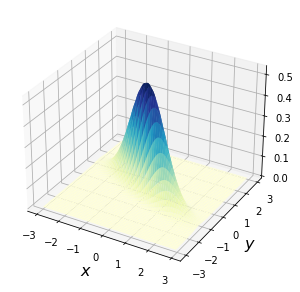

In [14]:
# color map
# cmap=cm.viridis, cmap=cm.YlGnBu
cmsel = cm.YlGnBu

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1,projection='3d')
ax1.set_xlabel(r'$x$', fontsize=16)
ax1.set_ylabel(r'$y$', fontsize=16)
ax1.view_init(30,-60)
ax1.plot_surface(x, y, z, rstride=2, cstride=2, linewidth=1, antialiased=True, cmap=cmsel);

In [15]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

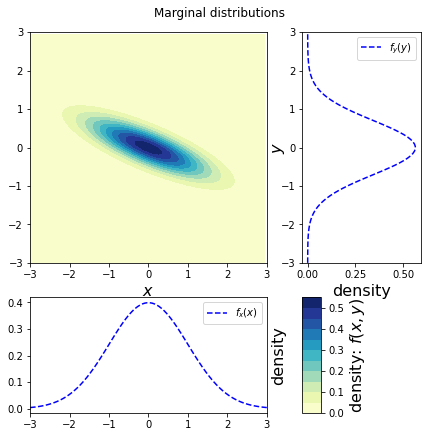

In [16]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Marginal distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
# Plot bivariate distribution
con = ax1.contourf(x, y, z, 10, cmap=cmsel)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.yaxis.set_label_position('right')
ax1.axis([xmin, xmax, ymin, ymax])

# Plot y
ax2 = plt.subplot(gs[1])
yl = np.linspace(ymin, ymax, 100)
py = univariate_normal(yl, mu[1], sigma_y)
# Plot univariate distribution
ax2.plot(py, yl, 'b--', label=f'$f_y(y)$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=16)
ax2.set_ylim(ymin, ymax)

# Plot x
ax3 = plt.subplot(gs[2])
xl = np.linspace(xmin, xmax, 100)
px = univariate_normal(xl, mu[0], sigma_x)
# Plot univariate distribution
ax3.plot(xl, px, 'b--', label=f'$f_x(x)$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=16)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(xmin, ymax)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $f(x, y)$', fontsize=16)
plt.show()

# References
* [jupyterlab interactive plot](https://stackoverflow.com/questions/50149562/jupyterlab-interactive-plot)
* [Multivariate normal distribution (peterroelants.github.io io)](https://peterroelants.github.io/posts/multivariate-normal-primer/)
* [stackoverflow: How to plot a 2d gaussian with different sigma?](https://stackoverflow.com/questions/28342968/how-to-plot-a-2d-gaussian-with-different-sigma)
* [matplotlib: 3d plots](https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py)
* [pylab 3d scatter plots with 2d projections of plotted data](https://stackoverflow.com/questions/29549905/pylab-3d-scatter-plots-with-2d-projections-of-plotted-data)